# Curvas de aprendizaje

En este notebook se muestra el comportamiento que sufrirá un modelo de regresión conforme aumentemos la cantidad de datos. <p>
Dividiremos la muestra en un 25% entrenamiento y 75% test para darle más peso a la capacidad de generalización. <p>
Se corresponde al capitulo 4 del TFG, apartado "Evaluación de modelos". <p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(seed=3)

La variable dependiente $y$ vendrá definida por la siguiente relación: <p>
$$y = 1 -2x + 3x^{2} + \epsilon \ \ ; \ \ \epsilon \sim \mathcal{N}(0,\,\sigma^{2} = 0.01)$$ <p>
**m** tamaño de la muestra<p>
$x \in{(0,1)}$

In [2]:
m = 3000
a = 1
b = -2
c = 3
X = np.random.random(m).reshape(m, 1)
epsilon = np.random.normal(0, 0.1, m).reshape(m, 1)
y = a + b*X + c*X**2 + epsilon

Observamos la función para 100 puntos

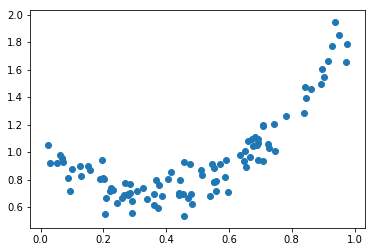

In [3]:
plt.scatter(X[:100], y[:100])
plt.show()

Trataremos dos funciones distintas, la primera con alto sesgo:
$$h_{1}(x) = \theta_{0} + \theta_{1}x$$ <p>

Segunda función con alta varianza: <p>
$$h_{2}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^{2} + \theta_{3}x^{3} + \theta_{4}x^{4} + \theta_{4}x^{5} + \theta_{6}x^{6} + \theta_{7}x^{7} + \theta_{8}x^{8}$$ <p>
Generaremos las nuevas variables de esta segunda función a partir de las iniciales con:

In [4]:
def polynomial(X):
    X2 = X**2
    X3 = X**3
    X4 = X**4
    X5 = X**5
    X6 = X**6
    X7= X**7
    X8 = X**8
    return(np.concatenate([X, X2, X3, X4, X5, X6, X7, X8], axis = 1))

Vamos a evaluar la precisión de cada modelo en función del número de datos, m. <p>
La métrica será el error cuadrático medio. 
$${\dfrac{1}{m}}{
\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2}$$

El valor óptimo viene dado por la varianza de $\epsilon$. <p>
**Óptimo: 0.01**

## Modelo con alto sesgo (Underfitting)

Inicializamos las variables

In [5]:
list_m = range(100, m, 10)
J_train = np.zeros(len(list_m))
J_val = np.zeros(len(list_m))

Generamos distintos modelos en función del número de datos.

In [6]:
count = 0
for i in list_m:
    k = int(i/4)
    reg = LinearRegression()
    reg.fit(X[:k], y[:k])
    J_train[count] = mean_squared_error(reg.predict(X[:k]), y[:k])
    J_val[count] = mean_squared_error(reg.predict(X[k:]), y[k:])
    count = count + 1

Dibujamos la curva de aprendizaje.

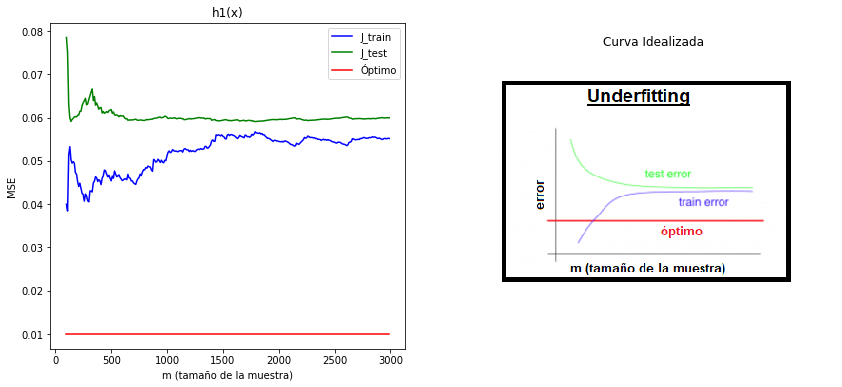

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(list_m, J_train, color='blue')
plt.plot(list_m, J_val, color='green')
plt.plot(list_m, [0.01 for i in range(len(list_m))], color = 'r')
plt.title('h1(x)')
plt.ylabel('MSE')
plt.xlabel('m (tamaño de la muestra)')
plt.legend(['J_train', 'J_test', 'Óptimo'])
plt.subplot(122)
img = mpimg.imread('data/ca3.png')
plt.imshow(img)
plt.title('Curva Idealizada')
plt.axis('off')
plt.show()

El hecho de disponer de un mayor número de datos no nos permite mejorar la capacidad predictiva en un modelo que sufre underfitting

## Modelo con alta varianza (Overfitting)

In [8]:
list_m = range(100, m, 10)
J_train = np.zeros(len(list_m))
J_val = np.zeros(len(list_m))

In [9]:
count = 0
for i in list_m:
    k = int(i/4)
    X_train = polynomial(X[:k])
    y_train = y[:k]
    X_val = polynomial(X[k:])
    y_val = y[k:]
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    J_train[count] = mean_squared_error(reg.predict(X_train), y_train)
    J_val[count] = mean_squared_error(reg.predict(X_val), y_val)
    count = count + 1

Dibujamos la curva de aprendizaje.

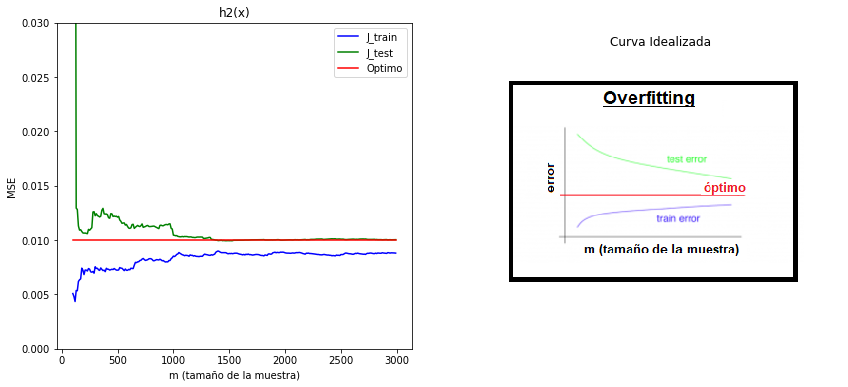

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(list_m, J_train, color = 'blue')
plt.plot(list_m, J_val, color = 'green')
plt.plot(list_m, [0.01 for i in range(len(list_m))], color = 'r')
plt.ylim(0,0.03)
plt.title('h2(x)')
plt.ylabel('MSE')
plt.xlabel('m (tamaño de la muestra)')
plt.legend(['J_train', 'J_test', 'Optimo'])
plt.subplot(122)
img = mpimg.imread('data/ca4.png')
plt.imshow(img)
plt.title('Curva Idealizada')
plt.axis('off')
plt.show()

Conforme aumentamos el número de datos, nuestro modelo aún siendo demasiado complejo, converge cerca de la solución óptima.